In [1]:
# Import necessary libraries for this project
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
# Reas your csv file
df = pd.read_csv("/content/drive/MyDrive/Uber_Dataset.csv")
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday


In [3]:
# To see the number of rows and columns in your dataset respectively
df.shape

(796121, 5)

In [4]:
# Find number of null values across each columns in your dataset
df.isnull().sum()


,0
Date/Time,0
Lat,0
Lon,0
Base,0
Date,0


In [5]:
#  Find the sum of duplicate rows in your dataset
df.duplicated().sum()

14152

In [6]:
# To ensure data is properly standardize, all duplicated rows are drop and the original dataframe is modified
df.drop_duplicates(inplace=True)

In [7]:
# See new numbers of rows and columns after duplicated rows are droped
df.shape

(781969, 5)

In [8]:
# We are working with only the coordinate so we work with only the lat and lon column
x = df[["Lat", "Lon"]]
x.head()

,Lat,Lon
0,40.7586,-73.9706
1,40.7605,-73.9994
2,40.7320,-73.9999
3,40.7635,-73.9793
4,40.7204,-74.0047


In [9]:
# Create KMeans model with 3 clusters with Fit and predict

model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
# Add cluster labels to DataFrame
df['y'] = y_kmeans

In [11]:
# See new cluster labels
df.head()

,Date/Time,Lat,Lon,Base,Date,y
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday,0
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday,0
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday,2
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday,0
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday,2


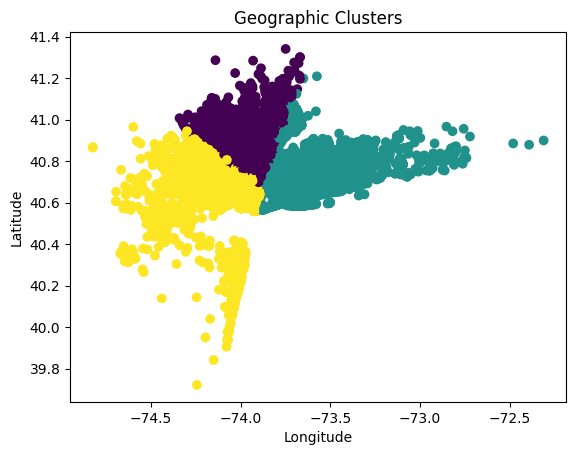

In [12]:
#Visualize clusters
plt.scatter(df['Lon'], df['Lat'], c=df['y'])
plt.title('Geographic Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [13]:
# Measures the sum of squared distances of samples to their closest cluster center.
model.inertia_

1914.7270054391422

In [15]:
# Used to capture output messages
%%capture
# Initialize an empty list to store the Within Cluster Sum of Squares (WCSS) values
wcss = []
# Loop through the range of possible cluster numbers (1 to 10)
for i in range(1,11):

    # Create a K-Means model with 'i' number of clusters
    model = KMeans(n_clusters=i)

    # Fit the model to the data 'x' and predict cluster labels
    y_kmeans = model.fit_predict(x)

    # Append the model's WCSS value (inertia_) to the list
    wcss.append(model.inertia_)

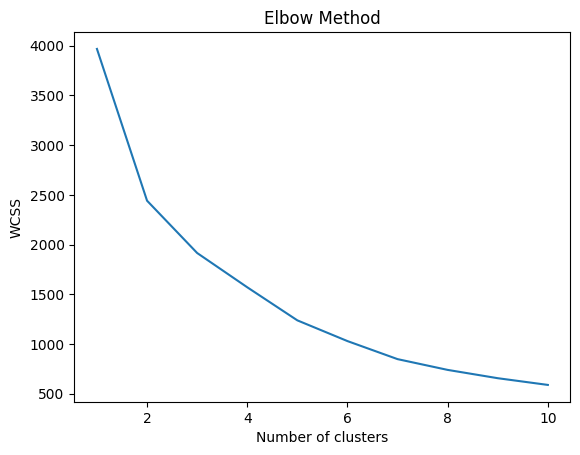

In [16]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [26]:
# Get unique cluster categories
cluster_labels = df['y'].unique()

In [27]:
# Initialize dictionary to store random samples
random_samples = {}

In [28]:
# Take 2000 random rows from each cluster category
for label in cluster_labels:
    cluster_df = df[df['y'] == label]
    n = min(2000, len(cluster_df))  # Ensure n doesn't exceed cluster size
    random_samples[f'cluster_{label}'] = cluster_df[['Lat', 'Lon']].sample(n=n, random_state=42)


In [29]:
# Extract latitude and longitude values
cluster_coords = {f'cluster_{label}': random_samples[f'cluster_{label}'].values.tolist() for label in cluster_labels}

In [30]:
# Define colors for each cluster
cluster_colors = {
    'cluster_0': ['blue', 'lightblue'],
    'cluster_1': ['red', 'lightred'],
    'cluster_2': ['green', 'lightgreen']
}

In [31]:
# Add markers for each cluster
for cluster_name, coords in cluster_coords.items():
    color, fill_color = cluster_colors[cluster_name]
    for coord in coords:
        folium.CircleMarker(coord, radius=2, color=color, fill_color=fill_color).add_to(map)


In [32]:
map

Output hidden; open in https://colab.research.google.com to view.